## 1. SVM(서포트벡터머신) 

### 파이썬 한권으로 끝내기 : P.201


: 서포트 벡터 머신은 선형이나 비선형 분류, 회귀, 이상치 탐색에 사용할 수 있는 다목적 머신러닝 모델이다. 복잡한 분류 문제에 특히 유용하며 작거나 중간 크기의 데이터에 적합하다. 또한 서포트 벡터 머신은 비확률적 이진 선형 분류 모델을 생성한다.

<장점>
- 분류와 예측에 모두 사용 가능하다.
- 신경망 기법에 비해 과적합 정도가 낮다.
- 예측의 정확도가 높다.
- 저차원과 고차원의 데이터에 모두 잘 작동한다.

<단점>
- 전처리와 파라미터에 따라 정확도가 달라진다. 
- 예측이 어떻게 이루어지는지에 대한 이해와 모델의 해석이 어렵다. 
- 대용량 데이터에 대한 모형 구축 시 속도가 느리며 메모리 할당량이 크다.
- 모든 데이터가 초평면에 의해 두 영역으로 분류되지는 못하기 때문에, 최대 마진 분류기는 모든 데이터에 적용하기 어렵고, 과적합과 이상치에 민감하다. 

<용어>
- 초평면 : p차원 공간에서 차원이 (p-1)인 아핀 부분공간으로 각 그룹을 분리하는 분류자
- 서포트 벡터 : 각 그룹에 속한 데이터 중 초평면에 가장 가까운 최전방 데이터들
- 마진 : 관측치에서 초평면까지 가장 짧은 거리


-> SVM은 데이터들 간의 벡터 거리를 측정하였을 때 그 거리가 최대가 되는 분류자를 찾아나간다. 

- SVM은 특성의 스케일링에 민감하기 때문에 scaler를 활용할 경우 결정경계가 훨씬 좋아진다. 

모든 데이터가 경계선의 바깥에 올바르게 분류되어 있는 경우를 하드 마진 분류라고 한다. 하드 마진 분류에서는 두 가지 문제점이 존재한다.
- 1. 데이터가 선형적으로 구분될 수 있어야 함
- 2. 이상치에 민감함

이러한 문제를 피하려면 클래스 간의 결정선을 넓게 유지하는 것과 마진 오류(샘플이 결정선 중간이나 반대에 있는 경우) 사이에 적절한 균형을 잡아야 하는데 이를 소프트 마진 분류라고 한다.

SVM 모델은 C 파라미터를 사용해 이 균형을 조절한다. C값을 줄이면 결정선의 폭이 넓어지지만 마진 높 커진다.
C = 0 이면 마진을 위반할 여유가 없고, C > 0 이면 C 이하의 관측치들이 반대쪽에 존재하는 것을 허용한다.

모든 데이터가 선형으로 나뉠수는 없기 때문에, 클래스의 경계가 비선형인 상황에서는 SVC의 개념을 확장하고 커널을 활용해 두 관측치의 유사성을 수량화한다. 비선형 데이터를 다루는 방법은 다항 특성과 같은 특성을 추가하는 것이다.

다항식 특성을 추가하는 것은 간단하고 대부분 머신러닝 알고리즘에서 잘 작동하지만 낮은 차수는 복잡한 데이터를 잘 표현하지 못하고 높은 차수의 데이터는 과적합이나 속도를 느리게 만든다.

이때 SVM은 커널 트릭을 사용하여 실제로 특성을 추가하지는 않지만 특성을 추가한 것 같은 결과를 얻을 수 있다. 

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것이다.

다항 특성 방식과 마찬가지로 커널 트릭을 사용하여 유사도 특성을 추가할 수 있다. 

(대체적으로 LinearSVC가 SVC(kernel = 'linear') 보다 훨씬 빠르다. 훈련 데이터가 아주 크거나 특성 수가 많을 떄 그렇고, 훈련 데이터가 너무 크지 않다면 가우시안 RBF 커널을 시도하는 것도 좋다.)

SVM 알고리즘은 회귀분석에도 사용할 수 있는데, 일정한 마진 오류 안에 도로 안에 가능한 많은 샘플이 들어가도록 학습한다. 이때, 마진 오류는 도로 밖의 샘플을 의미한다. 

- SVR은 SVC의 회귀버전이고, linearSVR은 LinearSVC의 회귀버전이다.
- LinearSVR은 수행 시간이 훈련 시간에 비해 선형적으로 늘어나지만 SVR은 훈련 데이터가 커지면 훨씬 느려진다.

### 1-1 분류

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
data1['target'] = load_breast_cancer().target
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X1 = data1.iloc[:,:-1]
y1 = np.array(data1.target)

In [4]:
scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(X1)

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_x1, y1, test_size=0.2, random_state=42)

lsvc = LinearSVC(random_state=42)
lsvc.fit(X1_train, y1_train)
pred = lsvc.predict(X1_test)

acc = accuracy_score(y1_test, pred)
acc

0.956140350877193

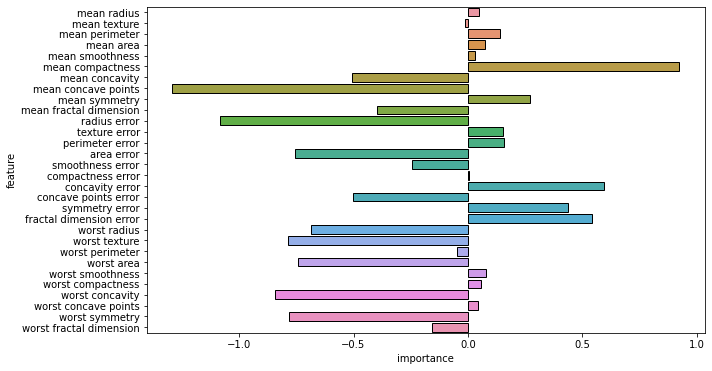

In [8]:
## 변수 중요도 (coef_)

f_imp = pd.DataFrame({'feature' : X1.columns.tolist(), 'importance' : lsvc.coef_.tolist()[0]})

plt.figure(figsize=(10,6))
sns.barplot(y = f_imp.feature, x = f_imp.importance, edgecolor=(0,0,0))
plt.show()

In [9]:
svc = SVC(random_state=42, kernel='poly')
svc.fit(X1_train, y1_train)

pred = svc.predict(X1_test)
accuracy_score(y1_test, pred)

0.868421052631579

### 1-2. 회귀

In [10]:
data2 = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
data2['target'] = load_boston().target

data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X2 = data2.iloc[:, :-1]
y2 = np.array(data2.target)

In [14]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size=0.2, random_state=42)

In [15]:
svr = SVR()
svr.fit(x2_train, y2_train)

pred = svr.predict(x2_test)
mse = mean_squared_error(y2_test, pred)
mse

25.69303665666322

In [17]:
lsvr = LinearSVR(random_state=42)
lsvr.fit(x2_train, y2_train)

pred = lsvr.predict(x2_test)
mse = mean_squared_error(y2_test, pred)
mse

30.070074329459402

## 결정 트리
